<a href="https://colab.research.google.com/github/fwkhan/CE888/blob/main/Lab_8/LAB_8-1_transfer_learning_FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os


In [ ]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')


# Get all the paths
data_dir_list = os.listdir('/content/data/Humans')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data/Humans"))
file_count = len(files)
print(file_count)

done
202


In [ ]:
# Get all the paths
data_dir_list = os.listdir('/content/data/cats')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data/cats"))
file_count = len(files)
print(file_count)

202


In [ ]:
# Get all the paths
data_dir_list = os.listdir('/content/data/dogs')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data/dogs"))
file_count = len(files)
print(file_count)

202


In [ ]:
# Get all the paths
data_dir_list = os.listdir('/content/data/horses')
#print(data_dir_list)
path, dirs, files = next(os.walk("/content/data/horses"))
file_count = len(files)
print(file_count)

202


In [ ]:
# Make new base directory
# original_dataset_dir = '/content/train'
base_dir = '/content/pictures'
os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
original_dataset_dir_horse= '/content/data/horses'
original_dataset_dir_cats= '/content/data/cats'
original_dataset_dir_dogs= '/content/data/dogs'
original_dataset_dir_human= '/content/data/Humans'

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(101, 151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(151, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cats, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1,101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(101, 151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(151, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dogs, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['rider-{}.jpg'.format(i) for i in range(1,101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_human, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(101, 151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_human, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(151, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_human, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(1,101)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horse, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(101, 151)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horse, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(151, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_horse, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [ ]:
def label_img(img):
    new_img = img.replace('-','.')
    word_label = new_img.split('.')[0]
    if word_label == 'dog': return 0
    elif word_label == 'cat': return 1
    elif word_label == 'horse': return 2
    elif word_label =='rider': return 3

In [ ]:
import cv2
def createDataSplitSet(datapath):
    X=[]
    y=[]
    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

import tensorflow as tf
train_y = tf.keras.utils.to_categorical(train_y, num_classes=4)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=4)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=4) 

(400, 224, 224, 3)
(200, 224, 224, 3)
(208, 224, 224, 3)


In [ ]:
## VGG 16

from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.layers import GlobalAveragePooling2D


# model.add(layers.Dense(64))
# model.add(layers.Activation(activations.relu))

last_layer = model.get_layer('block14_sepconv2').output
x= BatchNormalization(name='block14_sepconv2_bn')(last_layer)
x = Activation(activations.relu, name='block14_sepconv2_act')(x)
x = GlobalAveragePooling2D(name='avg_pool')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 4 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='Xception_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=20, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/20
20/20 [==============================] - 5s 140ms/step - loss: 1.3369 - acc: 0.5773 - val_loss: 1.1943 - val_acc: 0.9300
Epoch 2/20
20/20 [==============================] - 2s 85ms/step - loss: 1.1568 - acc: 0.9120 - val_loss: 1.0311 - val_acc: 0.9600
Epoch 3/20
20/20 [==============================] - 2s 83ms/step - loss: 0.9986 - acc: 0.9367 - val_loss: 0.8928 - val_acc: 0.9650
Epoch 4/20
20/20 [==============================] - 2s 84ms/step - loss: 0.8726 - acc: 0.9315 - val_loss: 0.7809 - val_acc: 0.9800
Epoch 5/20
20/20 [==============================] - 2s 84ms/step - loss: 0.7550 - acc: 0.9462 - val_loss: 0.6878 - val_acc: 0.9750
Epoch 6/20
20/20 [==============================] - 2s 82ms/step - loss: 0.6695 - acc: 0.9439 - val_loss: 0.6124 - val_acc: 0.9750
Epoch 7/20
20/20 [==============================] - 2s 84ms/step - loss: 0.6113 - acc: 0.9453 - val_loss: 0.5500 - val_acc: 0.9750
Epoch 8/20
20/20 [==============================] - 2s 85ms/step - loss: 0.5453 - 

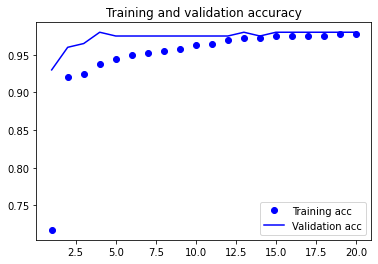

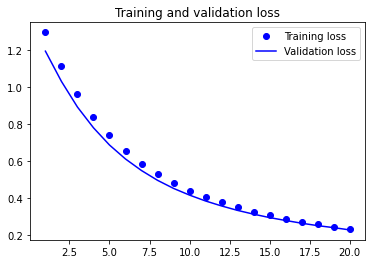

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

ValueError: ignored